In [87]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from housing_functions import scale_data, calc_pca, calc_loadings, calc_kmeans
import matplotlib.pyplot as plt
import seaborn as sns


In [88]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Basic info

In [89]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [90]:
train.drop_duplicates()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Separate numeric variable from categorical variable

In [91]:
numeric_data = train.select_dtypes(include=[np.number])
categorical_data = train.select_dtypes(exclude=[np.number])

print("numeric variables:",numeric_data.shape[1],"categorical variables:", categorical_data.shape[1])

numeric variables: 38 categorical variables: 43


In [81]:
scaled_data, scaled_data_df = scale_data(numeric_data)
np.any(np.isnan(scaled_data_df))
scaled_data_df = scaled_data_df.dropna()
numeric_data = numeric_data.dropna()

# PC Analysisshape

In [62]:
pca = calc_pca(scaled_data_df, 10)

In [63]:
reduced10 = pca.transform(scaled_data_df)
PCnames = ['PC'+str(i+1) for i in range(pca.n_components_)]
df_reduced = pd.DataFrame(reduced10, index=scaled_data_df.index, columns=PCnames)

(1121, 38)

In [131]:
pca_loadings = calc_loadings(pca, numeric_data)

In [132]:
loading_components = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loading_components, columns=pca_loadings.columns, index=pca_loadings.index)

# KMeans analysis

In [133]:
model, kmeans_res = calc_kmeans(reduced10, n_clust=6, df_scaled=scaled_data_df)

In [130]:
result = pd.concat([numeric_data,df_reduced, kmeans_res], axis=1)

C:\Users\shals\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Id', ylabel='SalePrice'>

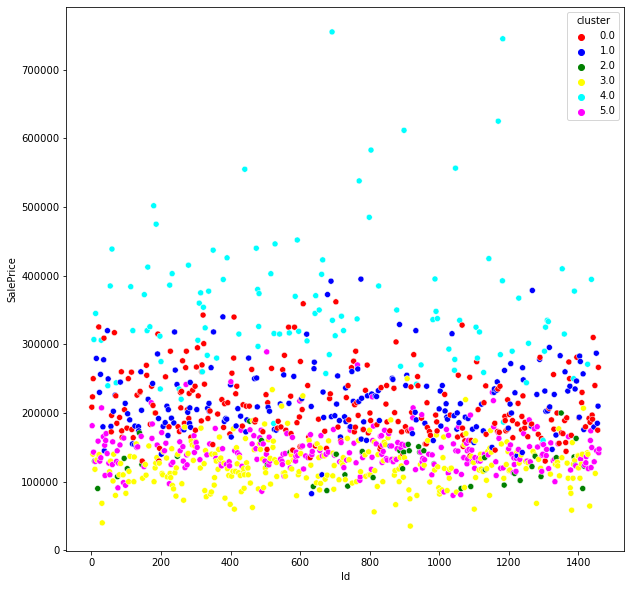

In [116]:
color_list= ['red', 'blue', 'green', 'yellow', 'cyan', 'magenta', 'gray', 'black']
palette = color_list[:6]

plt.figure(figsize=(10, 10))
sns.scatterplot(result['Id'], result['SalePrice'], hue=result.cluster, palette=palette)

C:\Users\shals\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

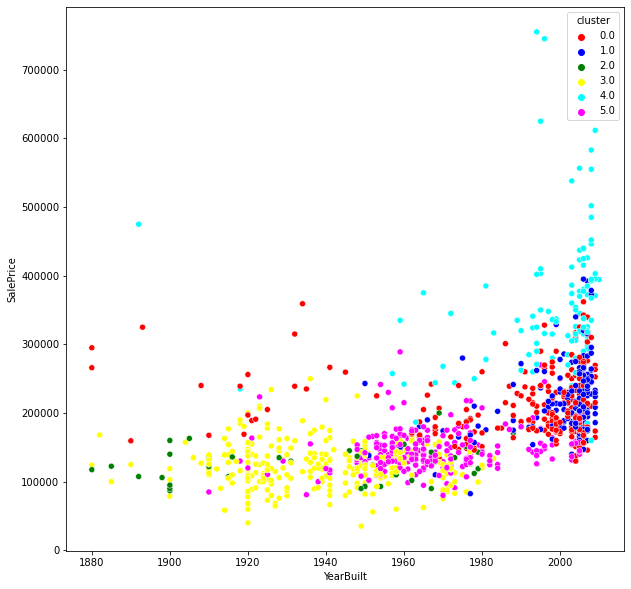

In [117]:
plt.figure(figsize=(10, 10))
sns.scatterplot(result['YearBuilt'], result['SalePrice'], hue=result.cluster, palette=palette)

C:\Users\shals\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

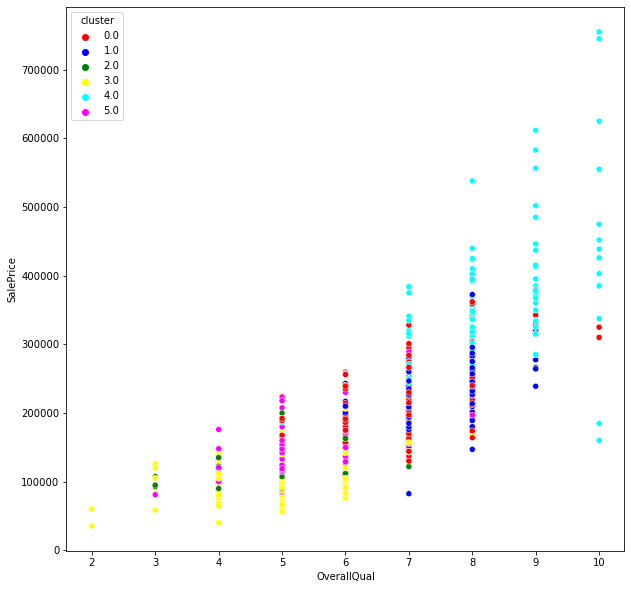

In [129]:
plt.figure(figsize=(10, 10))
sns.scatterplot(result['OverallQual'], result['SalePrice'], hue=result.cluster, palette=palette)